In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [ ]:
dataset  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SignDataSet.zip (Unzipped Files)/sign_mnist_train/sign_mnist_train.csv')

In [ ]:
datasetTest  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SignDataSet.zip (Unzipped Files)/sign_mnist_test/sign_mnist_test.csv')

In [ ]:
data = dataset.values
data.shape

(27455, 785)

In [ ]:
dataTest = datasetTest.values
dataTest.shape

(7172, 785)

In [ ]:
X, y = data[:,1:], data[:, 0]

In [ ]:
Xt, yt = dataTest[:,1:], dataTest[:, 0]

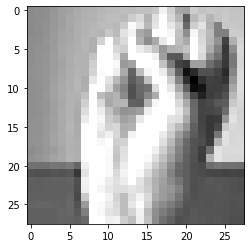

In [ ]:
im = X[4997].reshape((28,28))
plt.figure()
plt.imshow(im, cmap='gray')
plt.show()

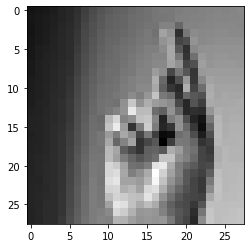

In [ ]:
im = Xt[4997].reshape((28,28))
plt.figure()
plt.imshow(im, cmap='gray')
plt.show()

In [ ]:
split = int(X.shape[0] * 0.80)
X_train,  y_train  = X[:split],  y[:split]
split = int(Xt.shape[0] * 0.80)
X_test, y_test = Xt[split:], yt[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(21964, 784) (21964,)
(1435, 784) (1435,)
[ 3  6  2 ...  7 12 10]
[10 12 16 ...  2  4  2]


In [ ]:
def knn(X_train, y_train, test_point, k=5):
    
    distances = [] # Contains list of tuples (distance, label
    
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]
    
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=5):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [17]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=5)

0.8229965156794425